In [2]:
# importing pandas and numpy
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('D:\Water Quality Analysis and Prediction\water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Analysis 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Checking for Null Values
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
# Dropping Null Values
data= data.dropna()

In [7]:
data.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

## Not potable is much more potable(1200 > 811) so we need to balance the data to prevent bias

In [8]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]  

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200) 

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data) 

In [9]:
# Data Shape
data.shape

(2400, 10)

In [10]:
data.Potability.value_counts()

1    1200
0    1200
Name: Potability, dtype: int64

# Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Plot

<AxesSubplot:>

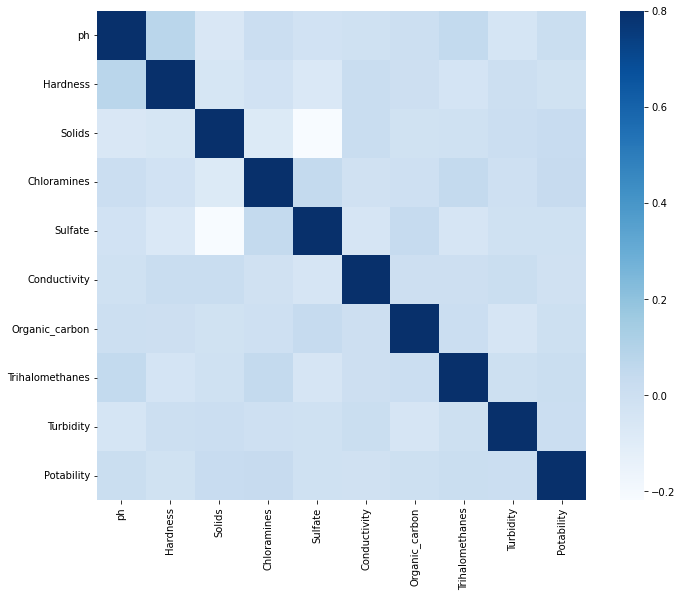

In [12]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="Blues")

<AxesSubplot:>

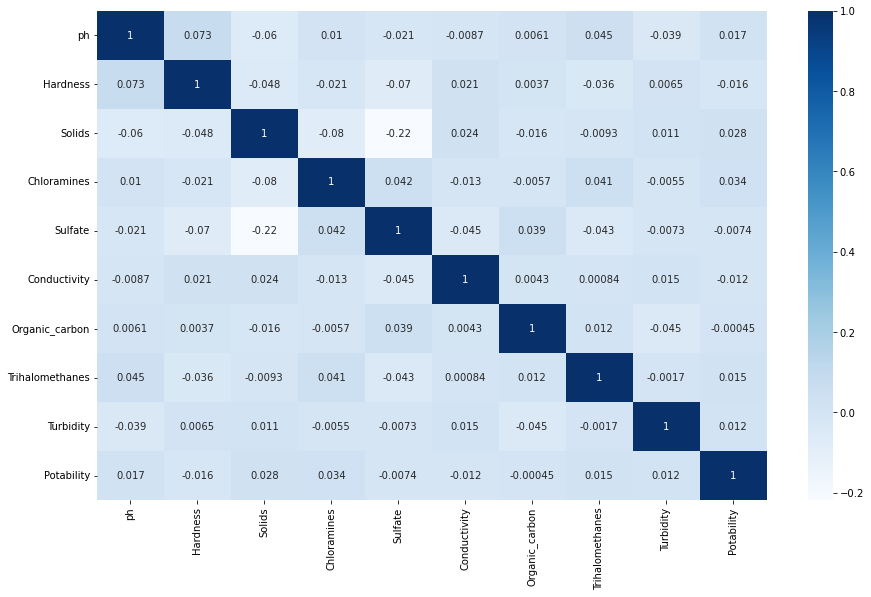

In [13]:
# Heatmap with Correlation
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot = True,cmap="Blues")

In [14]:
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Chloramines        0.033910
Solids             0.027991
ph                 0.016513
Trihalomethanes    0.015365
Turbidity          0.011897
Organic_carbon    -0.000446
Sulfate           -0.007438
Conductivity      -0.011729
Hardness          -0.015728
Name: Potability, dtype: float64

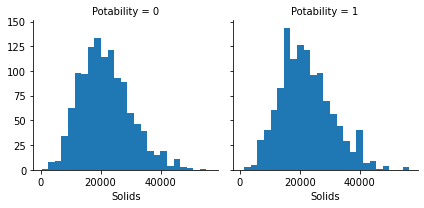

In [15]:
g = sns.FacetGrid(data, col='Potability')
g.map(plt.hist, 'Solids', bins=25)

#### Skewness of Each of the Column

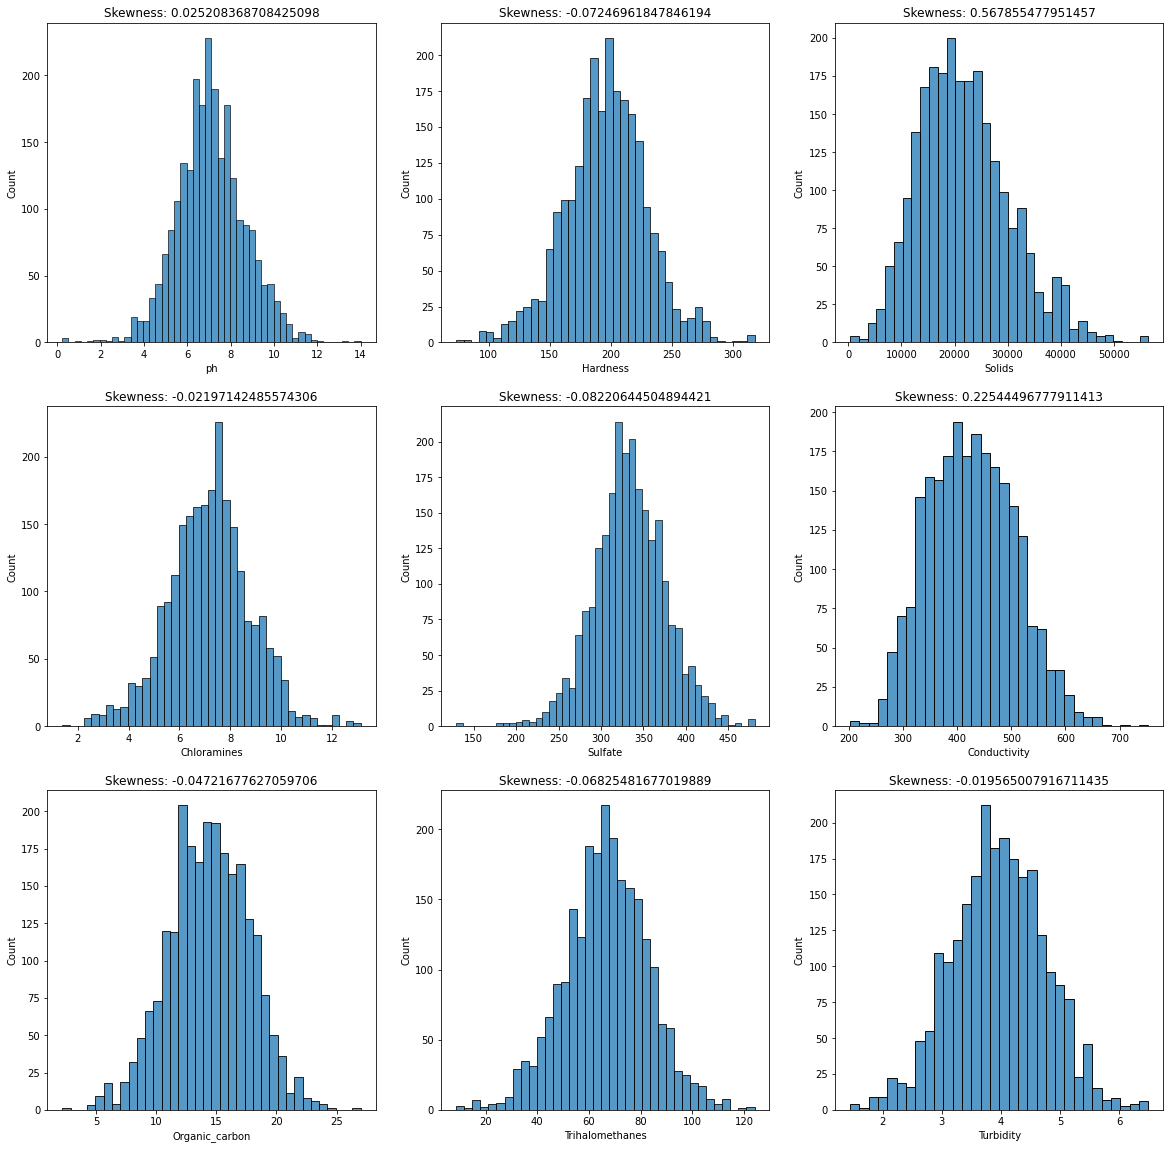

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
cols = np.array(data.columns[:9]).reshape(3, 3)


for i in range(3):
    for j in range(3):
        skewness = f"Skewness: {data[cols[i][j]].skew()}" # it should be between -1 to 1
        ax = sns.histplot(data[cols[i, j]], ax=axs[i, j])
        ax.set_title(skewness)
        
plt.show()

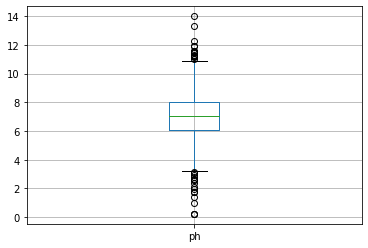

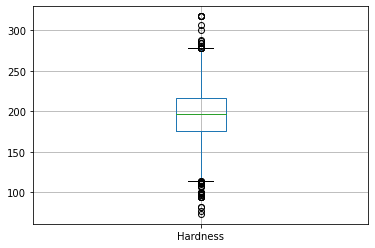

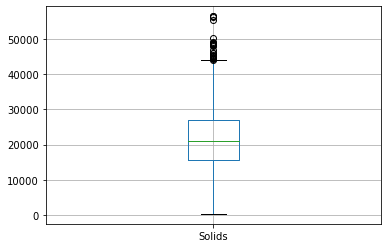

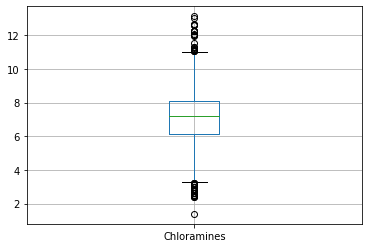

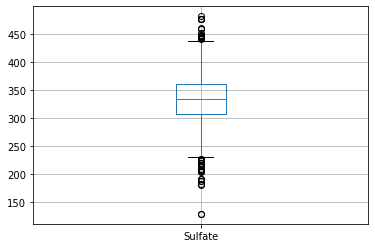

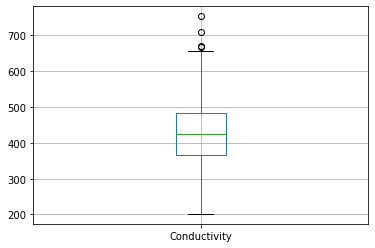

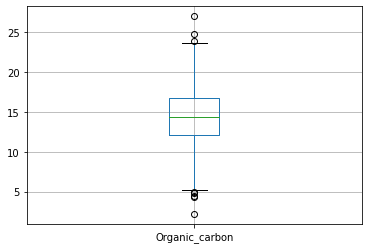

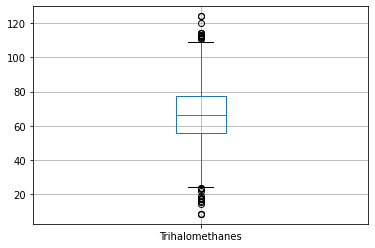

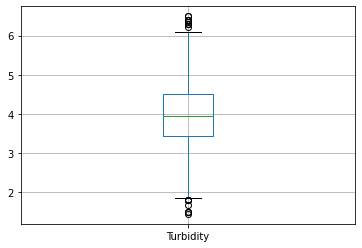

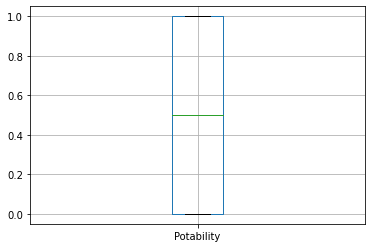

In [43]:
for column in data:
    plt.figure()
    data.boxplot([column])

# Applying Machine Learning Algorithm

In [51]:
#importing neccesary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
x = data.drop(['Potability'], axis = 1)
y = data['Potability']

In [18]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= x.columns
x[col] = st.fit_transform(x[col])
x[col]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1984,0.410676,-0.179178,2.936918,0.665107,-1.102288,1.754603,0.174648,0.289001,-0.576663
3011,-0.123099,-1.229966,-0.089314,0.479013,1.012563,0.293968,0.073472,0.296115,-0.442261
269,1.261454,-1.203470,-0.715804,0.056452,0.233186,0.457307,1.038268,1.028313,-0.396978
2738,-0.151089,1.131492,0.085859,-0.333763,0.824771,-0.176272,0.759361,-0.245196,0.434626
1987,-0.203623,-1.233012,-0.740565,-0.672780,0.228386,2.130825,0.817159,-0.642610,-1.203351
...,...,...,...,...,...,...,...,...,...
2219,0.332146,0.399906,1.479321,-0.974697,-0.752639,0.548711,0.381615,-1.924871,0.924654
375,-0.706966,0.873501,0.947451,0.138776,-0.087974,2.213537,1.004245,-0.087124,1.113155
2426,0.768108,0.809779,0.235362,-1.016790,0.512078,1.095726,-0.959410,-0.569126,0.412587
2268,0.475773,-0.725661,0.472894,0.891567,-0.623213,0.272967,0.603616,-0.391946,-0.548443


In [19]:
# Train test splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

In [20]:
# ML models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [21]:
# decision Tree and randomforest Grid search
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)


In [22]:
# Best Parameters for Decisoin Tree and Random Forest
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 49, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}


# Decision Tree Algorithm 

In [45]:
# metrics of the model
target_names = ['Potability 0','Potability 1']

dt.fit(X_train, Y_train)    
y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Decision Tree {:.2f} Accuracy'.format(accuracy))
report = classification_report(Y_test, y_pred,target_names=target_names)
print(report)
tp,fn,fp,tn = confusion_matrix(Y_test,y_pred).flatten()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity,'\n\n\n\n\n')

Decision Tree 0.71 Accuracy
              precision    recall  f1-score   support

Potability 0       0.71      0.63      0.67       111
Potability 1       0.71      0.78      0.75       129

    accuracy                           0.71       240
   macro avg       0.71      0.71      0.71       240
weighted avg       0.71      0.71      0.71       240

Sensitivity:  0.6306306306306306
Specificity:  0.7829457364341085 







# Random Forest Algorithm

In [47]:
rf.fit(X_train, Y_train)    
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Random Forest {:.2f} Accuracy'.format(accuracy))
report = classification_report(Y_test, y_pred,target_names=target_names)
print(report)
tp,fn,fp,tn = confusion_matrix(Y_test,y_pred).flatten()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity,'\n\n\n\n\n')

Random Forest 0.82 Accuracy
              precision    recall  f1-score   support

Potability 0       0.78      0.86      0.82       111
Potability 1       0.86      0.79      0.83       129

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

Sensitivity:  0.8558558558558559
Specificity:  0.7906976744186046 







# Roc-Graph

In [50]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
dt_probs = dt_probs[:, 1]

In [52]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
dt_auc = roc_auc_score(Y_test, dt_probs)

In [54]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (dt_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.875
Naive Bayes: AUROC = 0.707


In [55]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, dt_probs)

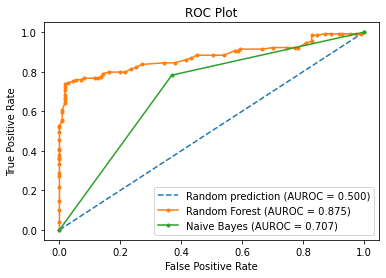

In [56]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % dt_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()